## Discretisation with k-means clustering

This discretisation method consists in applying k-means clustering to the continuous variable.

Briefly, the algorithm works as follows:

- 1) Initialization: random creation of K centers
- 2) Each data point is associated with the closest center
- 3) Each center position is re-computed as the center of its associated points

Steps 2 and 3 are repeated until convergence is reached. The algorithm minimises the pairwise squared deviations of points within the same cluster.

More details about k-means [here](https://en.wikipedia.org/wiki/K-means_clustering)

Nice blog with graphical explanation of k-means [here](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0) 

Note that the user, needs to define the number of clusters, as with equal width and equal frequency discretisation.

## Opinion of the instructor

I personally don't see how this technique is different from equal width discretisation, when the variables are continuous throughout the value range. Potentially it would make a different if the values were arranged in real clusters.

So my recommendation is, unless you have reasons to believe that the values of the variable are organised in clusters, then use equal width discretisation as an alternative to this method.


## In this demo

We will learn how to perform k-means discretisation using the Titanic dataset and Scikit-learn

## Titanic dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('../titanic.csv',
                   usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

The variables Age and Fare contain missing data, that I will fill by extracting a random sample of the variable.

In [4]:
def impute_na(data, variable):
    # function to fill NA with a random sample

    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [5]:
# replace NA in both train and test sets

X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

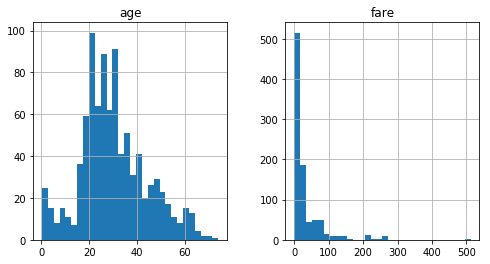

In [6]:
# let's explore the distribution of age

X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

## Equal frequency discretisation with Scikit-learn

In [7]:
disc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

disc.fit(X_train[['age', 'fare']])

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='kmeans')

In [8]:
disc.bin_edges_

array([array([ 0.1667    , 13.50716125, 26.24501412, 37.58671123, 51.55674859,
       74.        ]),
       array([  0.        ,  48.38317511, 155.62486898, 371.03119259,
       512.3292    ])], dtype=object)

In [9]:
train_t = disc.transform(X_train[['age', 'fare']])

train_t = pd.DataFrame(train_t, columns = ['age', 'fare'])

train_t.head()

,age,fare
0,0.0,0.0
1,0.0,0.0
2,2.0,0.0
3,1.0,0.0
4,1.0,0.0


In [10]:
test_t = disc.transform(X_test[['age', 'fare']])

test_t = pd.DataFrame(test_t, columns = ['age', 'fare'])

Text(0, 0.5, 'Number of observations per bin')

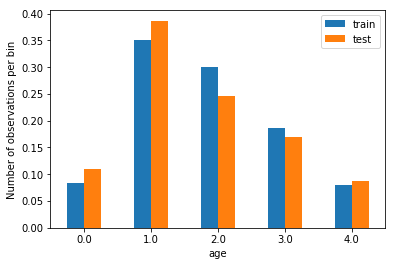

In [11]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

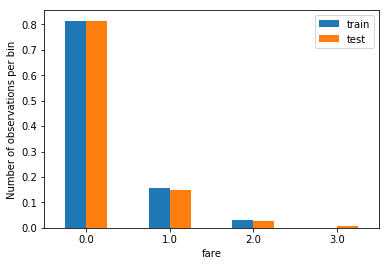

In [12]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')